## Problem Statement: Mood-Based Music Recommendation System

The proliferation of digital music platforms has provided users with access to vast libraries of songs. However, finding the right music to match one's current emotional state can be a challenging task.  Traditional music recommendation systems often rely on collaborative filtering (analyzing listening habits of similar users) or content-based filtering (analyzing musical features like genre or tempo). These methods often fail to capture the nuanced relationship between music and emotions, and they rarely consider the user's immediate emotional context.

This project addresses the need for a more personalized and context-aware music recommendation system by developing an application that detects user mood from visual input (still images or videos) and recommends music accordingly.  The core challenge lies in accurately inferring a user's emotional state from visual data and then mapping that emotional state to relevant musical characteristics.

Specifically, this project aims to:

1. **Develop robust image/video analysis techniques:**  This involves extracting relevant features from visual data that are indicative of emotional states.  This might include facial expression analysis, body posture recognition, or even analysis of the overall scene depicted in the image/video.  The extracted features should be robust to variations in lighting, pose, and image/video quality.

2. **Build an accurate mood classification model:**  This requires training a machine learning model that can effectively classify user mood based on the extracted visual features.  The model should be able to distinguish between a range of emotions (e.g., happy, sad, angry, surprised, neutral) with a high degree of accuracy.  The choice of machine learning algorithm and the size and diversity of the training dataset are crucial for the model's performance.

3. **Design a mood-based music recommendation engine:**  This component will map the classified user mood to a set of relevant music tracks.  This might involve creating a database of songs tagged with emotional labels or using existing music information retrieval techniques to identify songs that match specific emotional profiles. The recommendation engine should be able to provide diverse and personalized recommendations that cater to the user's specific mood.

4. **Integrate the different components into a user-friendly application:**  The final application should provide a seamless user experience, allowing users to easily capture images or videos and receive real-time music recommendations.  The user interface should be intuitive and visually appealing.

**Expected Outcomes:**

*   A functional application that can detect user mood from images/videos and recommend music accordingly.
*   A well-trained mood classification model with high accuracy on a held-out test set.
*   A robust music recommendation engine that provides relevant and diverse recommendations.
*   A comprehensive report documenting the project's design, implementation, and evaluation.

**Potential Challenges:**

*   Accurately capturing the complexity and subtlety of human emotions from visual data.
*   Building a sufficiently large and diverse dataset for training the mood classification model.
*   Mapping emotional states to musical characteristics in a meaningful way.
*   Ensuring the real-time performance of the application.

By addressing these challenges, this project aims to contribute to the field of personalized music recommendation systems and provide users with a more engaging and emotionally resonant music experience.

In [1]:
pip install pandas numpy matplotlib seaborn opencv-python ydata-profiling scikit-learn tensorflow keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing Libraries

This section demonstrates the necessary Python libraries required for the project.  We'll be using popular libraries for data manipulation, image processing, deep learning, and more.


In [2]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns # For visualization
import glob  # For file path handling
import cv2 
import os # For interacting with the operating system
import ydata_profiling  # For EDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, hamming_loss, accuracy_score, make_scorer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV # For splitting data
from tensorflow import keras  # TensorFlow for deep learning
from keras.models import Sequential  # For creating sequential models
from keras.layers import Conv2D  # Convolutional layers
from keras.layers import MaxPooling2D  # Max pooling layers
from keras.layers import Flatten  # Flatten layer
from keras.layers import Dense  # Fully connected layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator # For image data augmentation

c:\Users\hrish\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Part 1: Data Preparation for Music Recommendation


This section focuses on preparing the data for our mood-based music recommendation system.  We'll begin by loading the necessary datasets, which will include both the mood labels (corresponding to images or videos) and the music data (song features, metadata, etc.).  We'll then explore the data, perform any necessary cleaning or preprocessing steps, and prepare it for use in our model training and recommendation engine.

### Loading Data

We'll start by loading the datasets required for this project. "../data/data_moods.csv"


In [3]:
mood_df = pd.read_csv("../data/data_moods.csv")

## Exploratory Data Analysis (EDA)

This section presents the exploratory data analysis performed on the mood and music data. We use visualizations and descriptive statistics to understand the data's characteristics, identify patterns, and uncover potential issues.

### Data Overview

First, we examine the overall structure and information of our datasets.

In [4]:
mood_df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [5]:
mood_df.tail()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,2020-06-19,36,123066,0.402,0.961,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,2019-11-19,5,435080,0.452,0.757,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,you broke me first,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,2020-04-17,87,169265,0.642,0.786,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,you were good to me,brent,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,2019-05-03,76,219146,0.561,0.913,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad
685,æfre,æfre,praam,2irbT1BSYaIEF44PlyKaoM,2020-07-17,41,186331,0.377,0.994,0.0156,0.881000,0.0991,0.0804,-28.435,0.0397,140.179,0,4,Calm


In [6]:
mood_df.describe()

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,41.534985,221791.485423,0.500553,0.449749,0.507693,0.349610,0.166867,0.342438,-11.531020,0.053946,119.134679,5.335277,3.870262
std,23.045707,63399.058492,0.158955,0.410729,0.326490,0.410517,0.142128,0.252304,7.468629,0.041374,28.978685,3.550858,0.500297
min,0.000000,76773.000000,0.078900,0.000005,0.001290,0.000000,0.031800,0.035300,-42.018000,0.023200,50.960000,0.000000,1.000000
25%,30.000000,179114.500000,0.388000,0.014825,0.202000,0.000034,0.092500,0.131250,-15.858750,0.033200,99.008750,2.000000,4.000000
50%,47.000000,213273.000000,0.505000,0.359000,0.495500,0.026350,0.111000,0.282000,-9.358000,0.040700,120.071000,6.000000,4.000000
75%,57.000000,254569.750000,0.612000,0.905750,0.844000,0.858250,0.173750,0.508750,-5.634500,0.057375,132.953250,9.000000,4.000000
max,88.000000,518373.000000,0.941000,0.996000,0.994000,0.966000,0.963000,0.977000,1.342000,0.416000,217.950000,11.000000,5.000000


In [7]:
mood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   release_date      686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

In [8]:
docs_dir="../docs"

### Mood Distribution
Understanding the distribution of moods in our dataset is crucial.

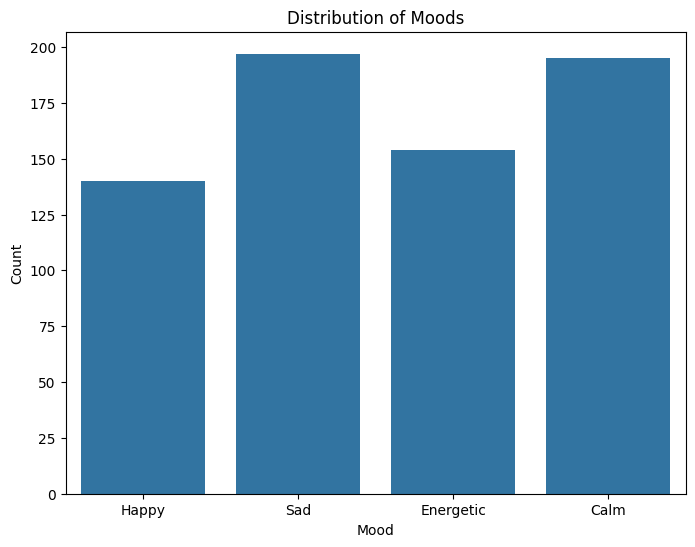

In [9]:
# 1. Distribution of Moods
plt.figure(figsize=(8, 6))
sns.countplot(x='mood', data=mood_df)
plt.title('Distribution of Moods')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.savefig(os.path.join(docs_dir, 'mood_distribution.png')) # Save the plot
plt.show()


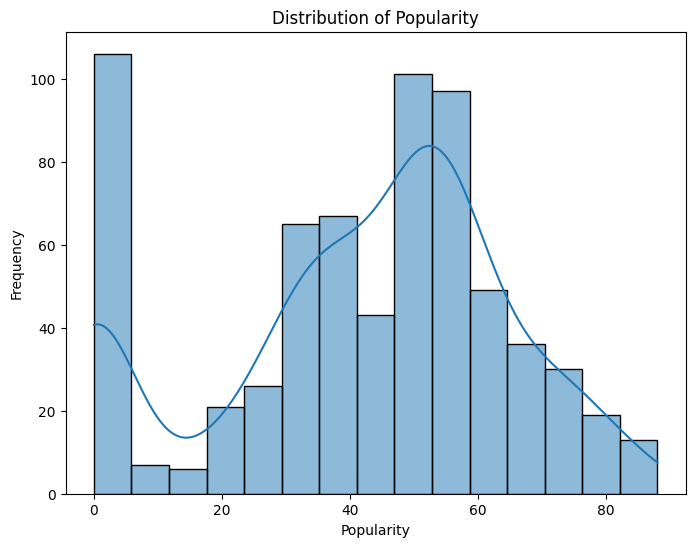

In [10]:

# 2. Distribution of Popularity
plt.figure(figsize=(8, 6))
sns.histplot(mood_df['popularity'], kde=True) # Use histplot for distribution
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.savefig(os.path.join(docs_dir, 'popularity_distribution.png'))
plt.show()


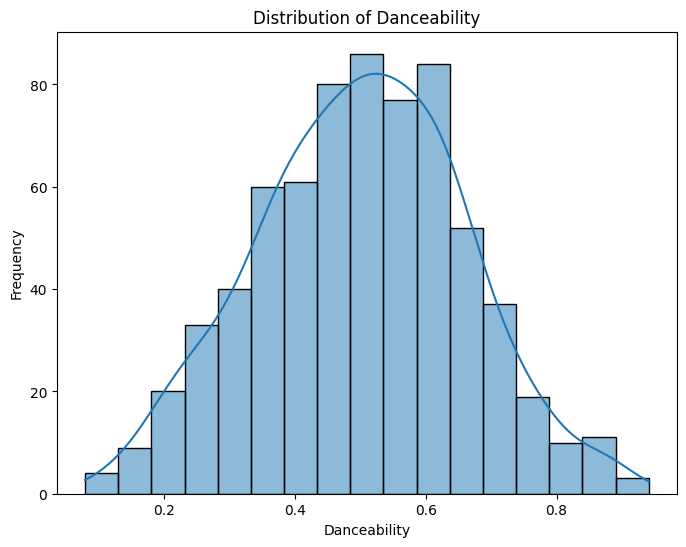

In [11]:

# 3. Distribution of Danceability
plt.figure(figsize=(8, 6))
sns.histplot(mood_df['danceability'], kde=True)
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.savefig(os.path.join(docs_dir, 'danceability_distribution.png'))
plt.show()


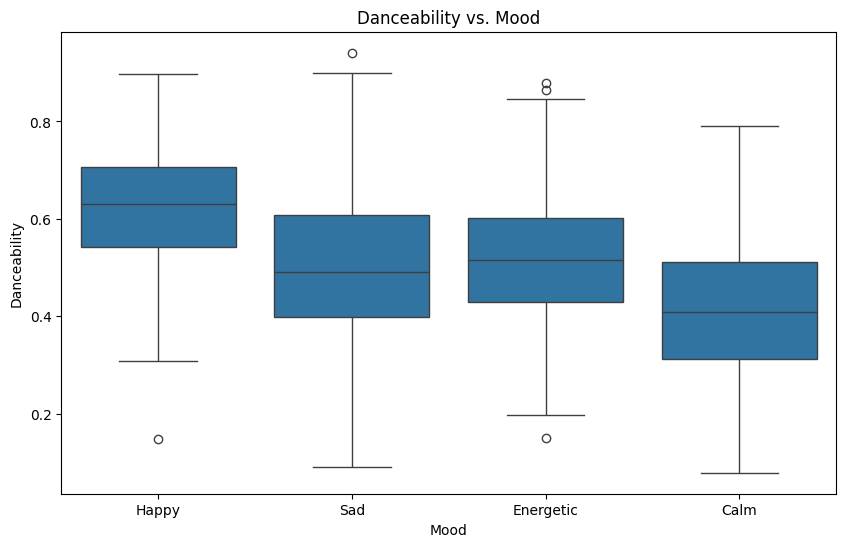

In [12]:


# 4. Danceability vs. Mood (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='mood', y='danceability', data=mood_df)
plt.title('Danceability vs. Mood')
plt.xlabel('Mood')
plt.ylabel('Danceability')
plt.savefig(os.path.join(docs_dir, 'danceability_vs_mood.png'))
plt.show()


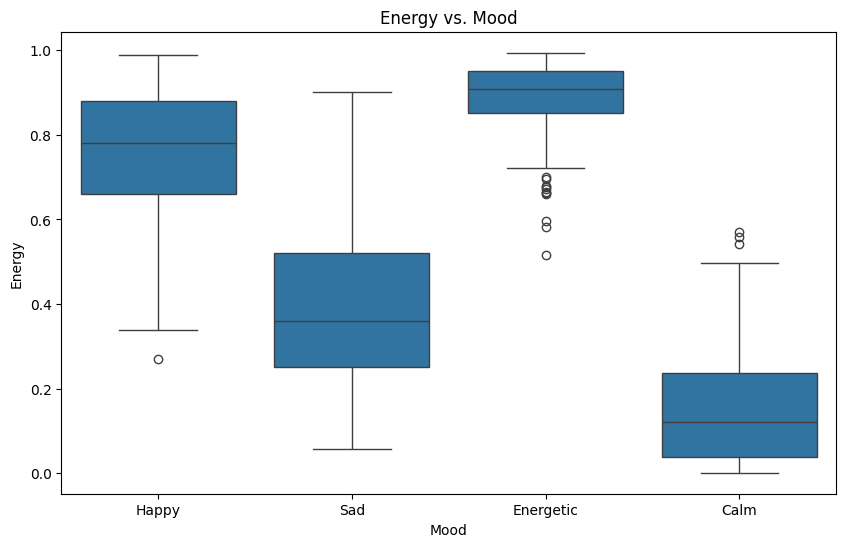

In [13]:

# 5. Energy vs. Mood (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='mood', y='energy', data=mood_df)
plt.title('Energy vs. Mood')
plt.xlabel('Mood')
plt.ylabel('Energy')
plt.savefig(os.path.join(docs_dir, 'energy_vs_mood.png'))
plt.show()


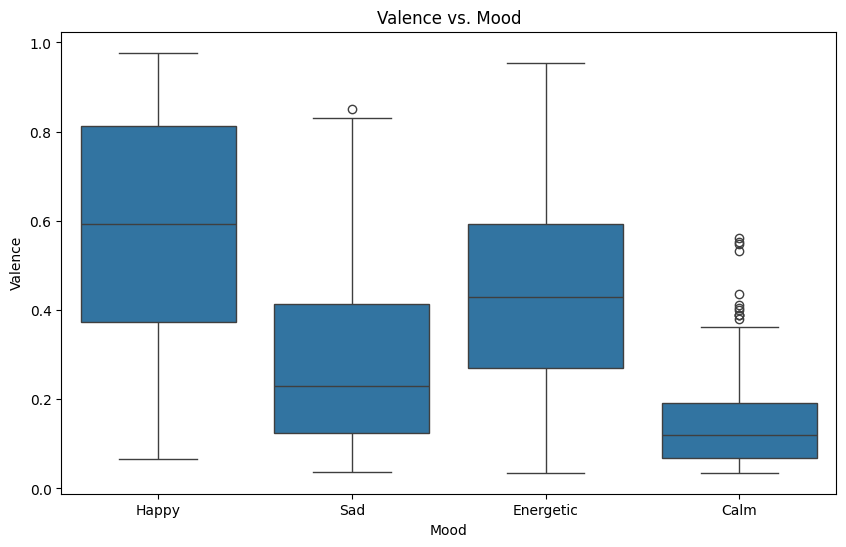

In [14]:

# 6. Valence vs. Mood (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='mood', y='valence', data=mood_df)
plt.title('Valence vs. Mood')
plt.xlabel('Mood')
plt.ylabel('Valence')
plt.savefig(os.path.join(docs_dir, 'valence_vs_mood.png'))
plt.show()



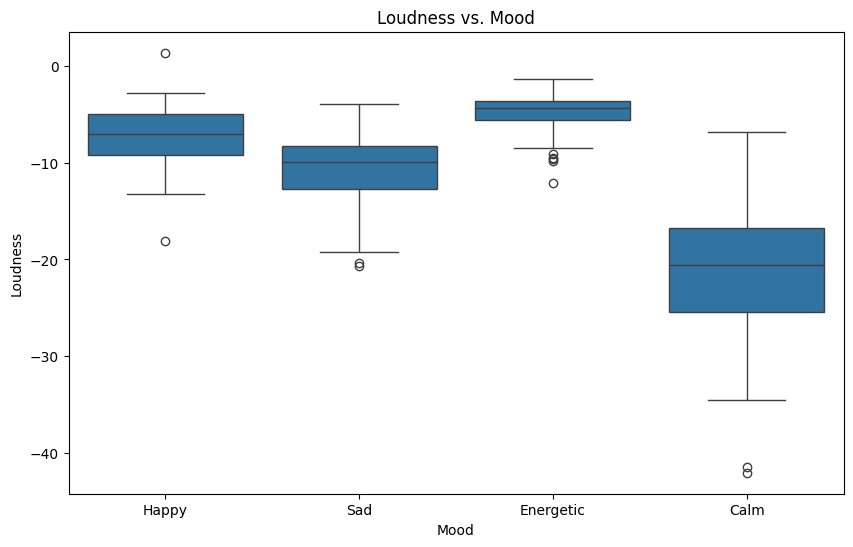

In [15]:

# 7. Loudness vs. Mood (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='mood', y='loudness', data=mood_df)
plt.title('Loudness vs. Mood')
plt.xlabel('Mood')
plt.ylabel('Loudness')
plt.savefig(os.path.join(docs_dir, 'loudness_vs_mood.png'))
plt.show()


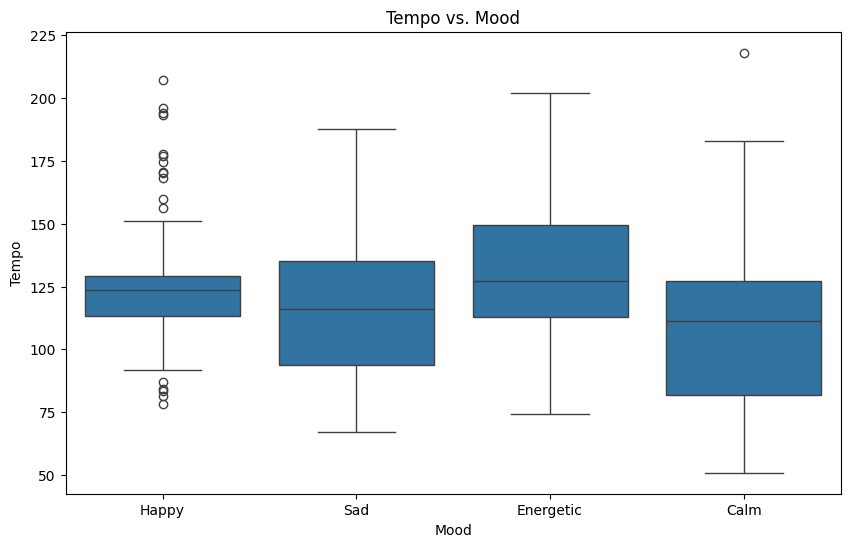

In [16]:

# 8. Tempo vs. Mood (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='mood', y='tempo', data=mood_df)
plt.title('Tempo vs. Mood')
plt.xlabel('Mood')
plt.ylabel('Tempo')
plt.savefig(os.path.join(docs_dir, 'tempo_vs_mood.png'))
plt.show()


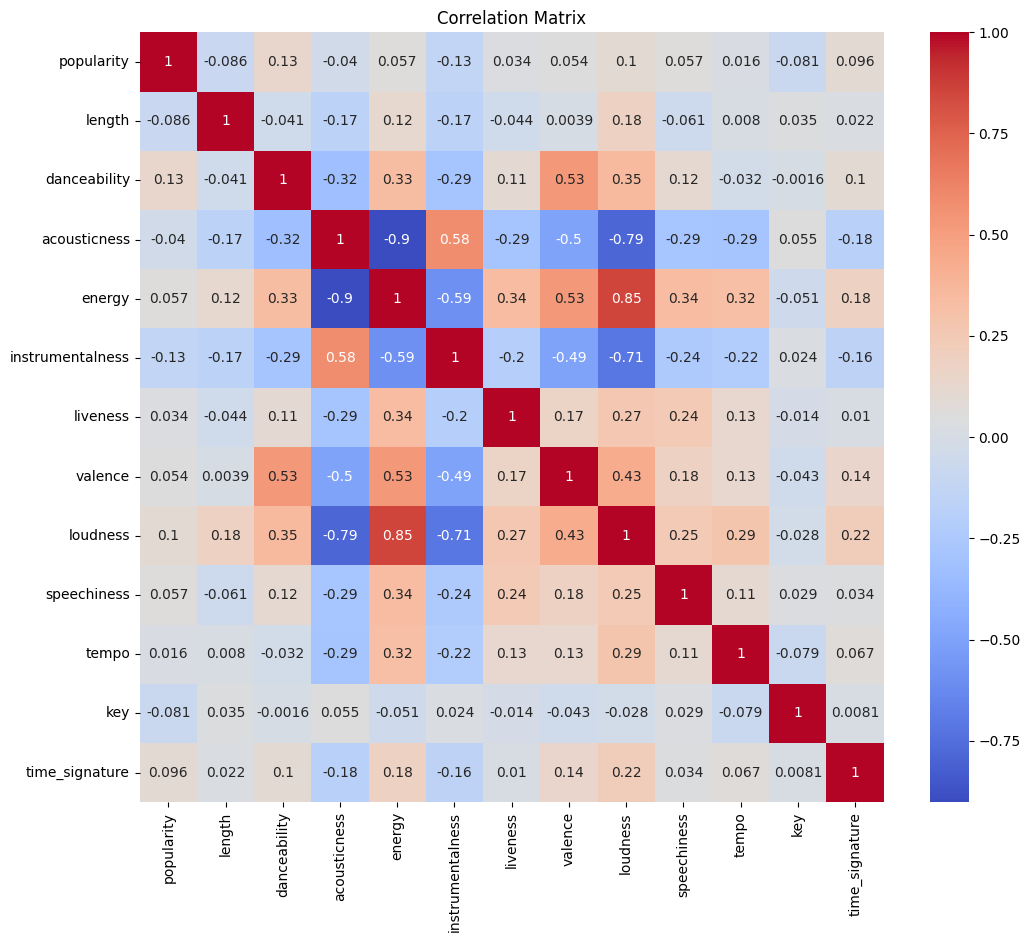

In [17]:


# 9. Correlation Matrix (Heatmap) - for numerical features
numerical_cols = mood_df.select_dtypes(include=['number']).columns  # Select numerical columns
correlation_matrix = mood_df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig(os.path.join(docs_dir, 'correlation_matrix.png'))
plt.show()


## Data Preprocessing

This section describes the steps taken to clean, preprocess, and transform the data to make it suitable for modeling.  We address missing values, handle outliers, encode categorical variables, and scale numerical features.

### 1. Handling Missing Values

We first identify and address any missing values in the dataset.

In [18]:
# 1. Handle Missing Values

# Identify columns with missing values (if any)
missing_cols = mood_df.columns[mood_df.isnull().any()].tolist()
print("Missing Columns:", missing_cols)


Missing Columns: []


This output indicates that there are no missing values in your DataFrame.

In [19]:

# 2. Convert 'release_date' to datetime

mood_df['release_date'] = pd.to_datetime(mood_df['release_date'], format='mixed', dayfirst=False, errors='coerce')

In [20]:

# 3. Feature Engineering (Optional, but often helpful)

# Example: Extract year from release_date
mood_df['release_year'] = mood_df['release_date'].dt.year

# Example: Create a 'decade' feature
mood_df['decade'] = (mood_df['release_year'] // 10) * 10


In [21]:


# 4. Handle Outliers (Consider carefully for each feature)

# Identify potential outliers (example using IQR for 'length')
Q1 = mood_df['length'].quantile(0.25)
Q3 = mood_df['length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers (you can also remove them or transform them)
mood_df['length'] = np.clip(mood_df['length'], lower_bound, upper_bound)



In [22]:


# 5. Encode Categorical Variables

# One-hot encode 'mood'
mood_df = pd.get_dummies(mood_df, columns=['mood'], prefix='mood')

# One-hot encode 'key' (if you want to treat it as categorical)
mood_df = pd.get_dummies(mood_df, columns=['key'], prefix='key')



In [23]:

# 6. Scale Numerical Features (Important for many models)

scaler = StandardScaler()
numerical_cols = mood_df.select_dtypes(include=np.number).columns  # Select numerical columns
mood_df[numerical_cols] = scaler.fit_transform(mood_df[numerical_cols])



In [24]:
# ---  Save the preprocessed data (optional but recommended) ---
mood_df.to_csv("../data/preprocessed_mood_data.csv", index=False)

print("\nPreprocessed data saved to: ../data/preprocessed_mood_data.csv")

print("\nFinal preprocessed data info:")
mood_df.info()


Preprocessed data saved to: ../data/preprocessed_mood_data.csv

Final preprocessed data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              686 non-null    object        
 1   album             686 non-null    object        
 2   artist            686 non-null    object        
 3   id                686 non-null    object        
 4   release_date      686 non-null    datetime64[ns]
 5   popularity        686 non-null    float64       
 6   length            686 non-null    float64       
 7   danceability      686 non-null    float64       
 8   acousticness      686 non-null    float64       
 9   energy            686 non-null    float64       
 10  instrumentalness  686 non-null    float64       
 11  liveness          686 non-null    float64       
 12  valence           686 non-null    float

In [25]:
mood_df.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,1.149209,2.575753,2.300744,-0.762003,0.681395,...,False,False,False,True,False,False,False,False,False,False
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,0.063616,1.722672,-0.752668,-1.049750,0.994037,...,False,False,False,False,False,False,True,False,False,False
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,0.801819,-0.034876,-0.973017,1.128697,-1.130088,...,False,False,False,False,False,False,False,False,False,False
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,-1.716755,0.227465,-0.217534,-0.878954,-0.213619,...,False,False,True,False,False,False,False,False,False,False
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,0.801819,0.837398,-0.513431,-1.091633,1.300548,...,False,False,False,False,False,False,False,False,False,False


## Feature Engineering (Combine existing features)

In [26]:
## 1. Interaction Features (Combine existing features)

# Example 1: Energy * Danceability (captures high-energy, danceable tracks)
mood_df['energy_danceability'] = mood_df['energy'] * mood_df['danceability']

# Example 2: Valence * Danceability (captures happy, danceable tracks)
mood_df['valence_danceability'] = mood_df['valence'] * mood_df['danceability']

# Example 3: Instrumentalness * Acousticness (captures acoustic instrumental tracks)
mood_df['acoustic_instrumental'] = mood_df['acousticness'] * mood_df['instrumentalness']

# Example 4: Speechiness * Energy (captures energetic tracks with more speech)
mood_df['speechiness_energy'] = mood_df['speechiness'] * mood_df['energy']

In [27]:
# # List of original columns to drop
# columns_to_drop = ['energy', 'danceability', 'valence', 'acousticness', 'instrumentalness', 'speechiness']

# # Drop the original columns
# mood_df = mood_df.drop(columns=columns_to_drop)

# # Verify the changes (optional)
# print(mood_df.head()) # Check if the new columns are present and the old ones are gone.
# print(mood_df.columns) # show all of the columns currently in the dataframe.

In [28]:
bins = [0, 100, 130, 220]  # Define your tempo bins
labels = ['slow', 'medium', 'fast']
mood_df['tempo_category'] = pd.cut(mood_df['tempo'], bins=bins, labels=labels, right=False) # right=False: include the left edge but not the right edge

In [29]:
# Example: Square root transformation for 'popularity'
if (mood_df['popularity'] <= 0).any(): # check if there is zero or negative values in popularity column
    mood_df['popularity'] = np.sqrt(mood_df['popularity']+1) # if yes, add 1 to avoid sqrt(0) error
else:
    mood_df['popularity'] = np.sqrt(mood_df['popularity']) # if no, use sqrt

c:\Users\hrish\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [30]:
# ---  Save the preprocessed data (optional but recommended) ---
mood_df.to_csv("../data/preprocessed_mood_data.csv", index=False)

print("\nPreprocessed data saved to: ../data/preprocessed_mood_data.csv")

print("\nFinal preprocessed data info:")
mood_df.info()


Preprocessed data saved to: ../data/preprocessed_mood_data.csv

Final preprocessed data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   686 non-null    object        
 1   album                  686 non-null    object        
 2   artist                 686 non-null    object        
 3   id                     686 non-null    object        
 4   release_date           686 non-null    datetime64[ns]
 5   popularity             564 non-null    float64       
 6   length                 686 non-null    float64       
 7   danceability           686 non-null    float64       
 8   acousticness           686 non-null    float64       
 9   energy                 686 non-null    float64       
 10  instrumentalness       686 non-null    float64       
 11  liveness               686 n

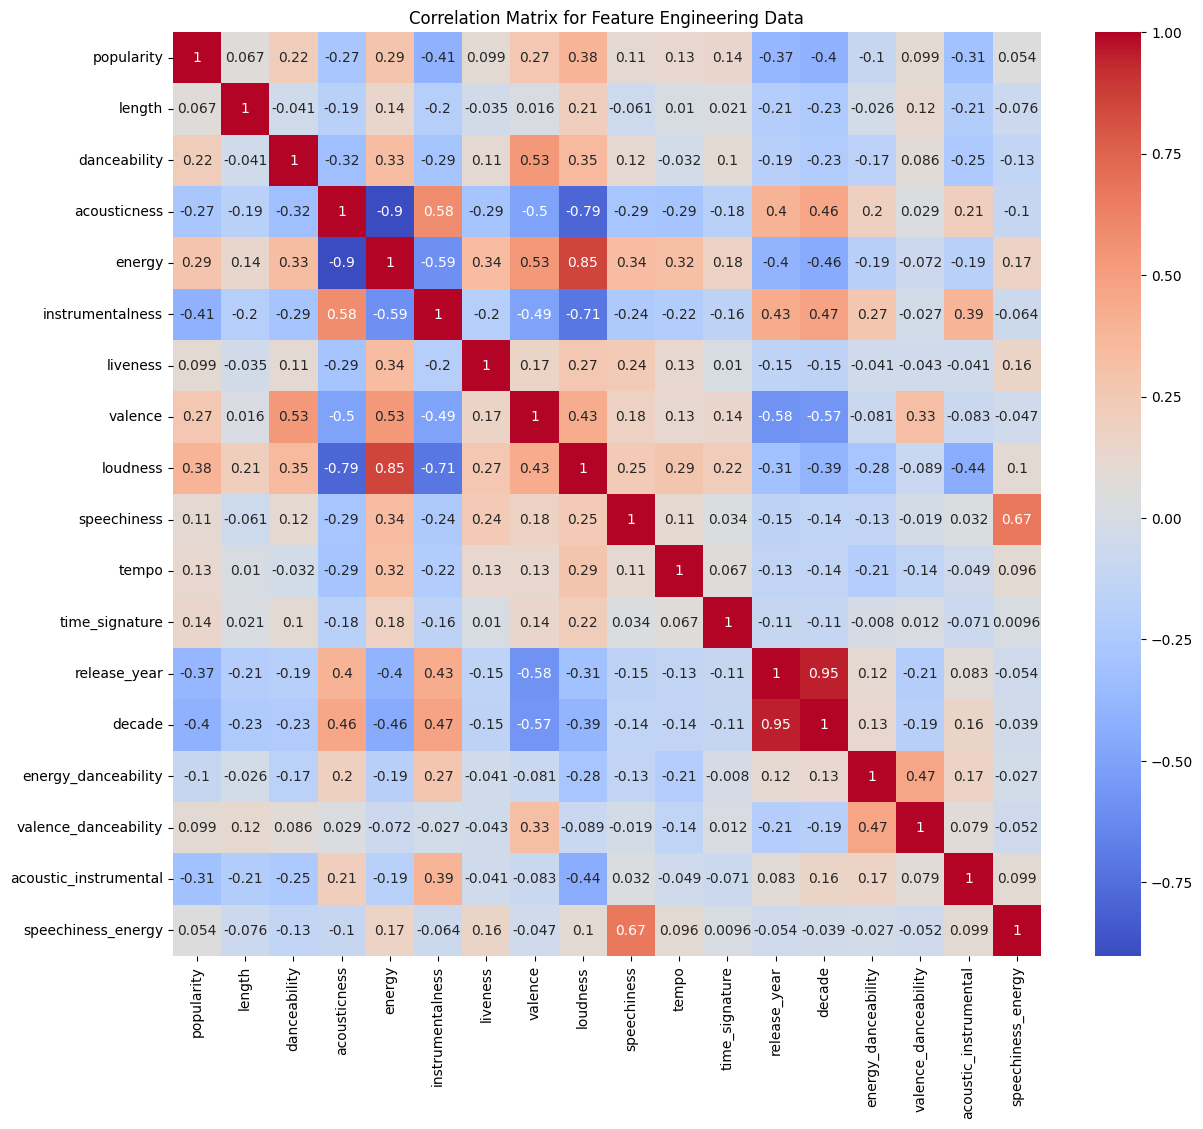

In [31]:
numerical_cols = mood_df.select_dtypes(include=['number']).columns  # Select numerical columns
correlation_matrix = mood_df[numerical_cols].corr()
plt.figure(figsize=(14 , 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Feature Engineering Data')
plt.savefig(os.path.join(docs_dir, 'correlation_matrix_FEdata.png'))
plt.show()


Specific Observations:

Strong Positive Correlations (Dark Red):

Release Year and Decade (0.95): This is an extremely strong positive correlation, as expected. The release year and decade are highly related; knowing one strongly predicts the other. This indicates potential multicollinearity if both are used in the model.
Energy Danceability and Valence Danceability (0.47): A moderate to strong positive correlation. Tracks that are both energetic and danceable tend to also be happy and danceable. This is consistent with our understanding of music.
Loudness and Tempo (0.29): There's a moderate positive correlation. Louder tracks tend to have a higher tempo.
Strong Negative Correlations (Dark Blue):

Release Year and Loudness (-0.31): There's a noticeable negative correlation. Older songs tend to be less loud.
Decade and Loudness (-0.39): Similar to release year, older decades tend to have less loud songs.
Acoustic Instrumental and Loudness (-0.44): Acoustic instrumental tracks tend to be less loud, which makes intuitive sense.
Popularity and Acoustic Instrumental (-0.3): Popular tracks tend to be less acoustic instrumental.
Release Year and Popularity (-0.35): There's a moderate negative correlation. Older songs tend to be less popular (potentially due to changing tastes).
Decade and Popularity (-0.38): Similar to release year, older decades tend to have less popular songs.
Moderate Correlations:

Liveness and Loudness (0.27): A moderate positive correlation. Live recordings might tend to be louder.
Energy Danceability and Tempo (0.21): A moderate positive correlation. Energetic and danceable tracks tend to have a higher tempo.
Valence Danceability and Loudness (0.14): A moderate positive correlation. Happy and danceable tracks tend to be louder.
Valence Danceability and Tempo (0.14): A moderate positive correlation. Happy and danceable tracks tend to have a higher tempo.
Speechiness Energy and Liveness (0.16): A moderate positive correlation. Tracks with more spoken word and energy tend to be live.
Weak Correlations (Close to 0):

Length with most features: Length shows weak correlations with most other features, suggesting it may be relatively independent.
Time Signature with most features: Time signature also shows weak correlations, indicating it may be less influential.
Key Observations and Implications:

Multicollinearity: The very high correlation between release year and decade suggests that you should likely choose only one of these features for your model to avoid multicollinearity issues, which can destabilize model performance.
Temporal Trends: The negative correlations between release year/decade and loudness/popularity highlight clear temporal trends in music.
Feature Engineering Effectiveness: The creation of interaction features like "energy danceability" and "valence danceability" seems to have captured meaningful relationships.
Acoustic vs. Popular: The negative correlation between acoustic instrumental and popularity suggests that this type of music might be less mainstream.


##### Recommendations:

Address Multicollinearity: Choose either release year or decade, but not both.
Consider Feature Importance: Use feature selection techniques to determine which features are most important for your model.
Further Exploration: Investigate the temporal trends further to understand how music characteristics have evolved over time.
Experiment with Interactions: The interaction features seem to be useful. Consider creating other interaction features that might be relevant.

In [32]:
# just verfy the new features with mood

# Load the original data (containing the 'mood' column)
original_mood_df = pd.read_csv("../data/data_moods.csv")

# Merge the 'mood' column from the original data to the feature-engineered data
# We'll use the 'id' column as the key for merging.  Make sure both DataFrames have this column.
df = pd.merge(mood_df, original_mood_df[['id', 'mood']], on='id', how='left')


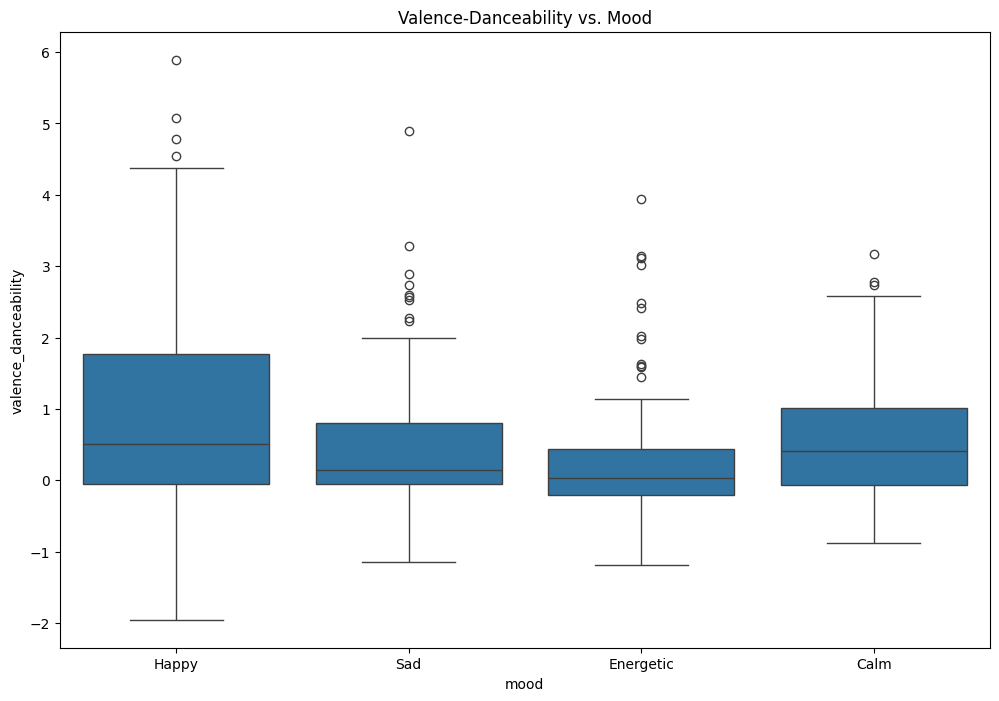

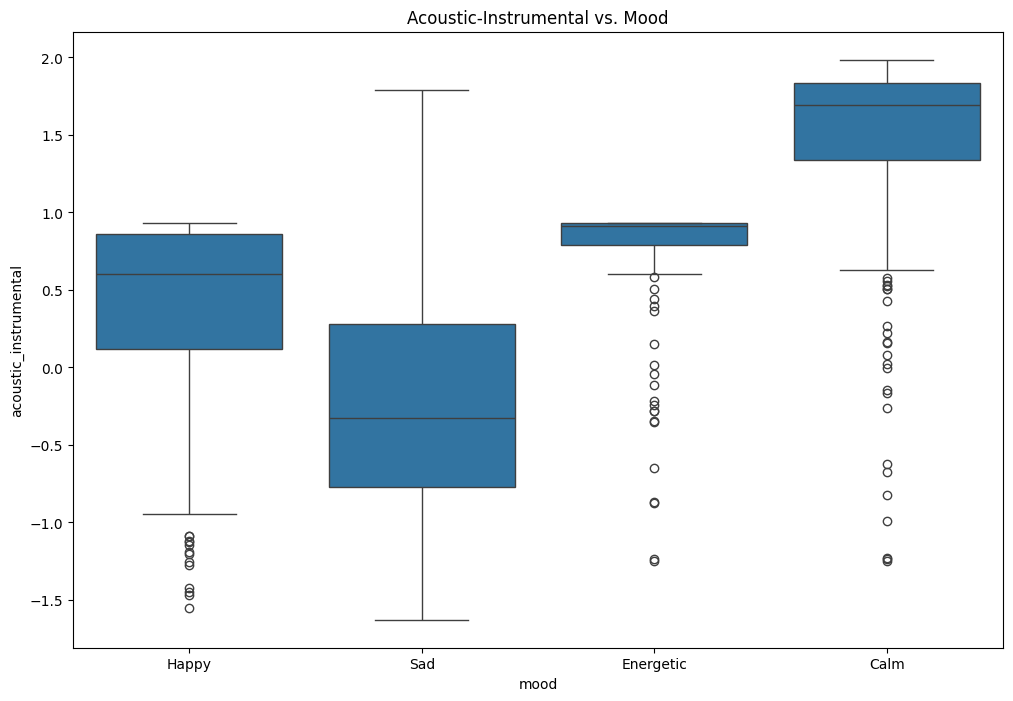

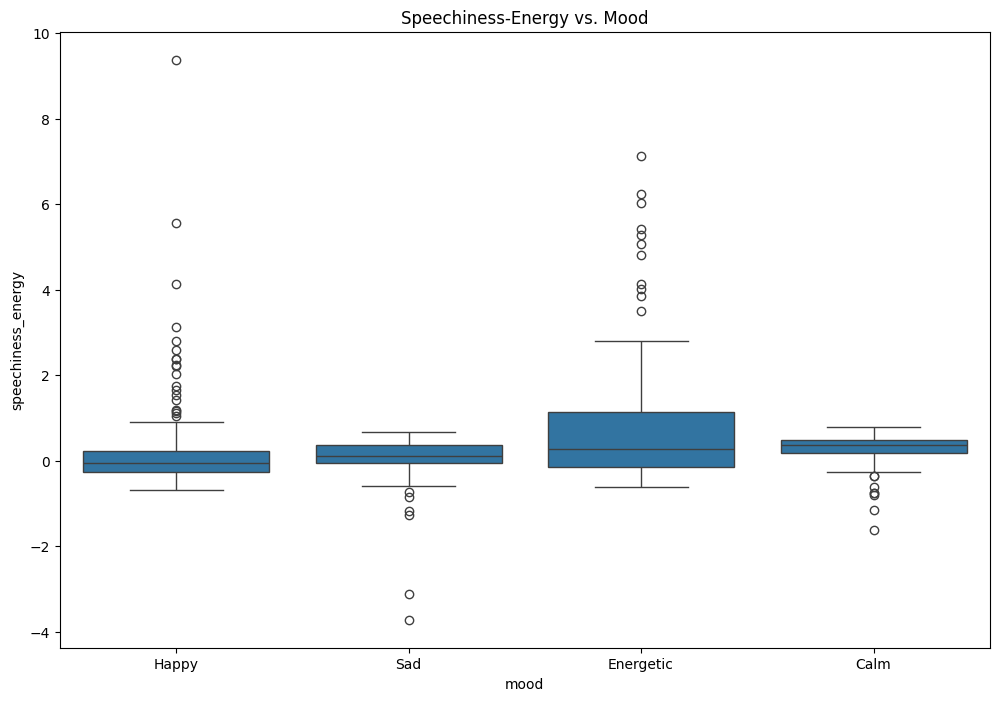

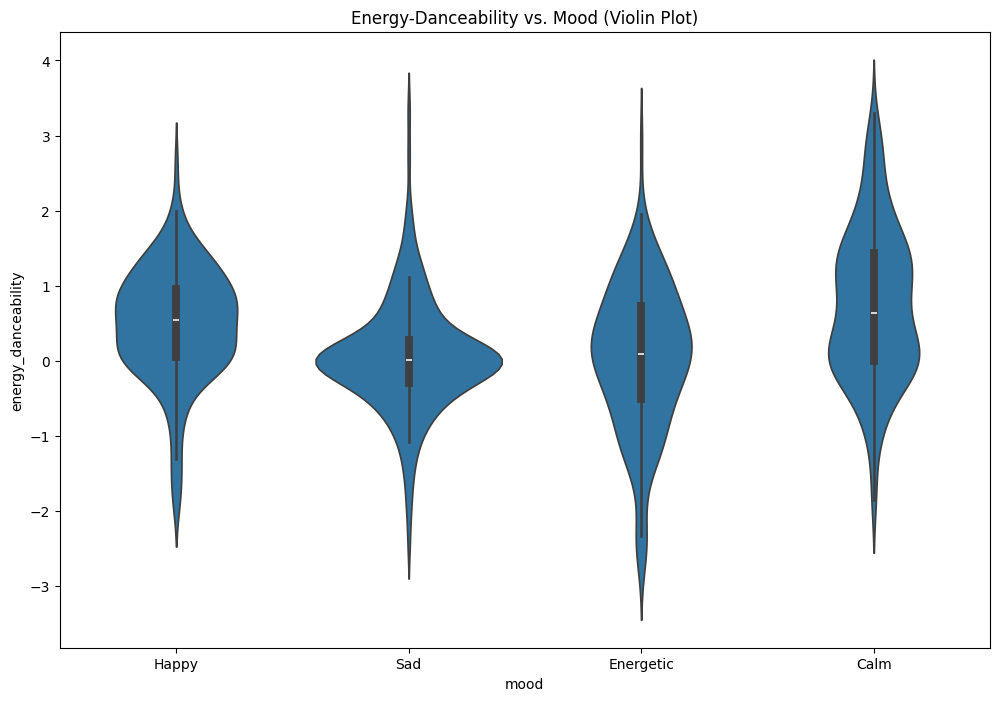

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='mood', y='valence_danceability', data=df)
plt.title('Valence-Danceability vs. Mood')
plt.savefig(os.path.join(docs_dir, 'valence_danceability_vs_mood_boxplot.png'))
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='mood', y='acoustic_instrumental', data=df)
plt.title('Acoustic-Instrumental vs. Mood')
plt.savefig(os.path.join(docs_dir, 'acoustic_instrumental_vs_mood_boxplot.png'))
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='mood', y='speechiness_energy', data=df)
plt.title('Speechiness-Energy vs. Mood')
plt.savefig(os.path.join(docs_dir, 'speechiness_energy_vs_mood_boxplot.png'))
plt.show()

# 2. Violin Plots for Engineered Features (alternative visualization)

plt.figure(figsize=(12, 8))
sns.violinplot(x='mood', y='energy_danceability', data=df)
plt.title('Energy-Danceability vs. Mood (Violin Plot)')
plt.savefig(os.path.join(docs_dir, 'energy_danceability_vs_mood_violinplot.png'))
plt.show()

In [34]:
mood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   686 non-null    object        
 1   album                  686 non-null    object        
 2   artist                 686 non-null    object        
 3   id                     686 non-null    object        
 4   release_date           686 non-null    datetime64[ns]
 5   popularity             564 non-null    float64       
 6   length                 686 non-null    float64       
 7   danceability           686 non-null    float64       
 8   acousticness           686 non-null    float64       
 9   energy                 686 non-null    float64       
 10  instrumentalness       686 non-null    float64       
 11  liveness               686 non-null    float64       
 12  valence                686 non-null    float64       
 13  loudn

In [ ]:
mood_labels = ['mood_Calm', 'mood_Energetic', 'mood_Happy', 'mood_Sad' ]
mlb = MultiLabelBinarizer()
y_lists = [row[mood_labels].astype(bool).tolist() for _, row in mood_df.iterrows()] # Convert to list of lists
y = mlb.fit_transform(y_lists)

In [ ]:
mood_df['release_year'] = mood_df['release_date'].dt.year
mood_df['release_decade'] = (mood_df['release_year'] // 10) * 10  # Convert to decades
mood_df = mood_df.drop(columns=['release_date'])

In [64]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_keys = encoder.fit_transform(mood_df[['key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11']])
encoded_keys_df = pd.DataFrame(encoded_keys, columns=encoder.get_feature_names_out())

# Drop original categorical columns and merge encoded ones
mood_df = mood_df.drop(columns=['key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11'])
mood_df = pd.concat([mood_df, encoded_keys_df], axis=1)

# --- ✅ Define Features (X) and Target (y) ---
features = ['energy_danceability', 'valence_danceability', 'acoustic_instrumental',
            'release_year', 'popularity', 'length', 'liveness', 'loudness',  
            'tempo', 'release_decade', 'speechiness_energy', 'energy', 'danceability',
            'valence', 'acousticness', 'instrumentalness', 'speechiness']  

# Include one-hot encoded categorical features
features.extend(encoded_keys_df.columns)

X = mood_df[features]
y = mood_df[['mood_Calm', 'mood_Energetic', 'mood_Happy', 'mood_Sad']]

# --- ✅ Standardize Numerical Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=features)  # Convert back to DataFrame

# --- ✅ Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


KeyError: "None of [Index(['key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7',\n       'key_8', 'key_9', 'key_10', 'key_11'],\n      dtype='object')] are in the [columns]"

In [65]:

# --- ✅ Train the Random Forest Model ---
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
model = rf_classifier.fit(X_train, y_train)


In [66]:

# ✅ Print Training Data Shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (548, 29)
X_test shape: (138, 29)
y_train shape: (548, 4)
y_test shape: (138, 4)


In [67]:
# --- Make predictions on the test set ---
y_pred = rf_classifier.predict(X_test)


In [68]:
# --- Evaluate the model ---

# 1. Hamming Loss
hamming_loss_value = hamming_loss(y_test, y_pred)
print(f"Hamming Loss: {hamming_loss_value}")

# 2. Subset Accuracy
subset_accuracy = accuracy_score(y_test, y_pred) # Exact match of all labels
print(f"Subset Accuracy: {subset_accuracy}")

# 3. Classification Report (per label)
print("Classification Report:")
print(classification_report(y_test, y_pred)) # Use mlb.classes_ to get label names

# --- (Optional) Save the trained model ---
import joblib
model_filename = "../models/random_forest_model.joblib"
joblib.dump(rf_classifier, model_filename)
print(f"Trained model saved to: {model_filename}")

Hamming Loss: 0.07789855072463768
Subset Accuracy: 0.7753623188405797
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.77      0.74      0.75        31
           2       0.87      0.46      0.60        28
           3       0.94      0.85      0.89        40

   micro avg       0.90      0.78      0.83       138
   macro avg       0.89      0.75      0.80       138
weighted avg       0.90      0.78      0.82       138
 samples avg       0.78      0.78      0.78       138

Trained model saved to: ../models/random_forest_model.joblib


c:\Users\hrish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Hyperparameter Tuning

In [69]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Access the best model from the grid search
best_model = grid_search.best_estimator_

# Now, you can use this best_model for making predictions or further analysis
# For example:
y_pred = best_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model:", accuracy)

# You can also access the best hyperparameters found during the grid search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Accuracy of the best model: 0.8043478260869565
Best hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


Since accuracy is greater than 75% we will proceed for further analysis

Confusion Matrix for 0:
[[99  0]
 [ 1 38]]

Confusion Matrix for 1:
[[100   7]
 [  7  24]]



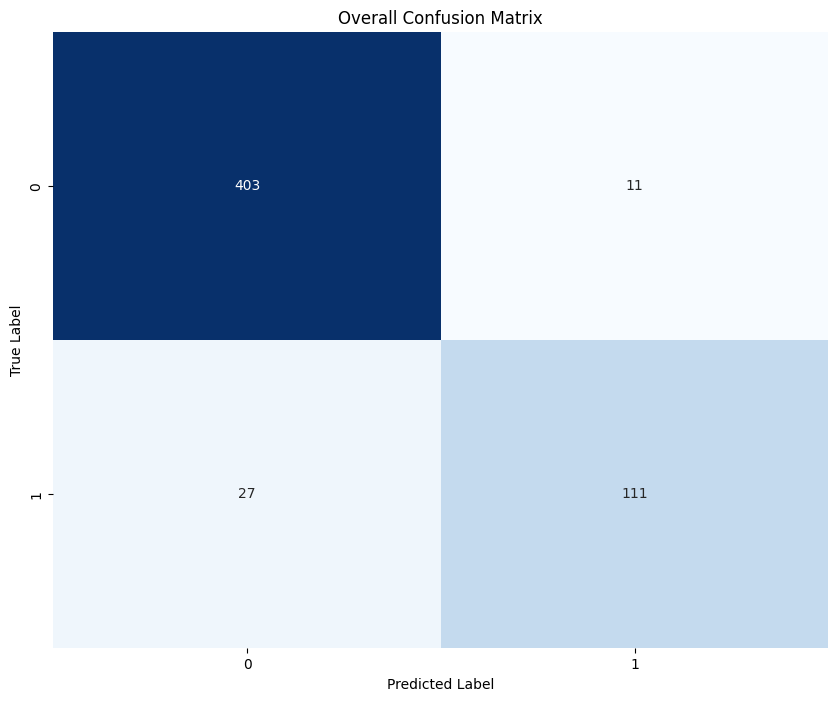

In [70]:
from sklearn.metrics import multilabel_confusion_matrix


# Calculate the Multi-label Confusion Matrix
mcm = multilabel_confusion_matrix(y_test, y_pred)

# Print or visualize the confusion matrix for each label
for i, label in enumerate(mlb.classes_):
    print(f"Confusion Matrix for {label}:\n{mcm[i]}\n")

# --- (Optional) Visualize confusion matrix using seaborn ---
plt.figure(figsize=(10, 8))
sns.heatmap(mcm.sum(axis=0), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=mlb.classes_, yticklabels=mlb.classes_) # Sum across all labels
plt.title('Overall Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [72]:
from joblib import dump

# Save the model
dump(best_model, '../models/mood_to_song_generator_model.joblib')


['../models/mood_to_song_generator_model.joblib']